### Student Information
Name: 李孟勳

Student ID: 111065534

GitHub ID: MengHsunLee

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

## Part One: Take home exercises

### Data preparations

In [2]:
%load_ext autoreload
%autoreload 2

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

import pandas as pd
import helpers.data_mining_helpers as dmh

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

---

### **>>> Exercise 2 (take home):**
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [3]:
#Answer here
import numpy as np
Y = X.copy() # Copy the dataframe
Y['random_num'] = pd.Series(np.random.randn(len(X))) # Append a column of random numbers
Y['random_num2'] = pd.Series(np.random.randn(len(X))) # Append another column of random numbers

In [4]:
Y.loc[:10, 'category_name':] # Showing records with columns after 'category_name'

category_name  random_num  random_num2
0            comp.graphics    0.501795    -0.827356
1            comp.graphics   -0.382405    -0.146501
2   soc.religion.christian    0.061262     1.372670
3   soc.religion.christian    0.314243    -0.687643
4   soc.religion.christian   -0.081257     0.828930
5   soc.religion.christian    1.180602     0.211485
6   soc.religion.christian    0.156347     0.651153
7                  sci.med    1.361080    -0.907620
8                  sci.med    0.205389    -0.560892
9                  sci.med    0.564040    -1.304910
10  soc.religion.christian    1.366261     0.494177

In [5]:
Y.loc[lambda df: df['random_num'] > 0].iloc[:10] # The first 10 records with random_num > 0

text  category  \
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1   
2   From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3   From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
5   From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6   From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7   From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9   From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
13  Subject: So what is Maddi? From: madhaus@netco...         0   

             category_name  random_num  random_num2  
0            comp.graphics    0.501795    -0.827356  
2   soc.religion.christian    0.061262     1.372670  
3   soc.religion.christian    0.314243    -0.687643  
5   soc.religion.christian    1.180602     0.211485  
6   soc.religion.christian    0.156347     0.651153  
7                  sci.med    1.361080    -0.907620  
8                  sci.med    0.205389    -0.560892  
9                  sci.med    0.564040    -1.304910  
10  soc.religion.christian    1.366261     0.494177  
13             alt.atheism    0.441738    -0.925695

---

### >>> **Exercise 5 (take home):** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [6]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [7]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [8]:
# Answer here
## The missing_example column of A and E is np.nan and None, respectively, therefore implies null values.
## The same column of B does not have a value, so it's considered as a null value too.
## In the cases of C, D and E, they are just strings with values 'NaN', 'None', ''.
## Those values are considered as strings instead of null values.

---

In [9]:
# Data preparations
X_sample = X.sample(n=1000) #random state

---

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

                          X  X_sample  X normalized  X_sample normalized
soc.religion.christian  599       263      0.265397                0.263
sci.med                 594       282      0.263181                0.282
comp.graphics           584       244      0.258751                0.244
alt.atheism             480       211      0.212672                0.211


<AxesSubplot: title={'center': 'Category distribution(normalized)'}>

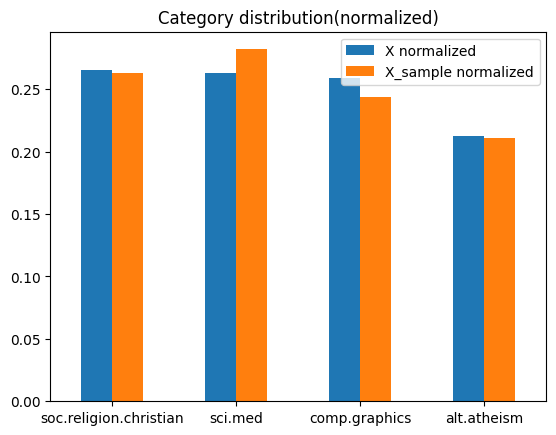

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

s1 = X.category_name.value_counts()
s1_n = X.category_name.value_counts(normalize=True)
s2 = X_sample.category_name.value_counts()
s2_n = X_sample.category_name.value_counts(normalize=True)
df = pd.concat({'X': s1,
                'X_sample': s2,
                'X normalized': s1_n,
                'X_sample normalized': s2_n}, axis=1)
print(df)
df.plot.bar(title='Category distribution(normalized)',
            y=['X normalized', 'X_sample normalized'], rot=0)

In [11]:
# Answer here
## 1. The indices of records are now in a random order
## 2. The records' distribution of categories are about the same with the original dataframe

---

### >>> **Exercise 8 (take home):**
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

<AxesSubplot: title={'center': 'Category distribution'}>

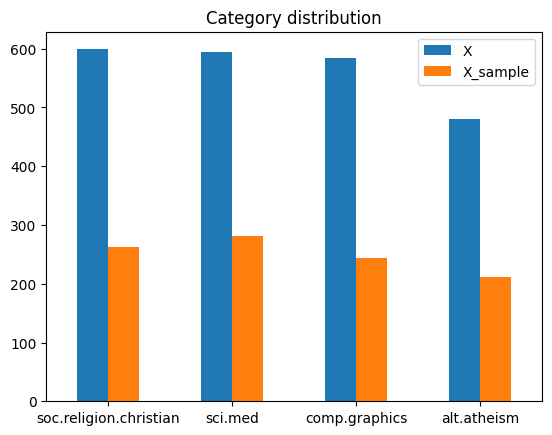

In [12]:
# Answer here
s1 = X.category_name.value_counts() # The series of X's category counts
s2 = X_sample.category_name.value_counts() # The series of X_sample's category counts
df = pd.concat({'X': s1,
                'X_sample': s2}, axis=1)
df.plot.bar(title='Category distribution',
            y=['X', 'X_sample'], rot=0)

---

In [13]:
# Data preparations
import nltk

X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [14]:
# Answer here
arr = X_counts[4].toarray() # The fifth record as an array
occurrence = np.where(arr == 1)[1] # The indices of occurrence(value == 1) as an array
index = occurrence[1] # The index of the second occurrence in the record (37 in this case)
print(count_vect.get_feature_names_out()[index]) # The corresponding word of the index (37)

01


---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

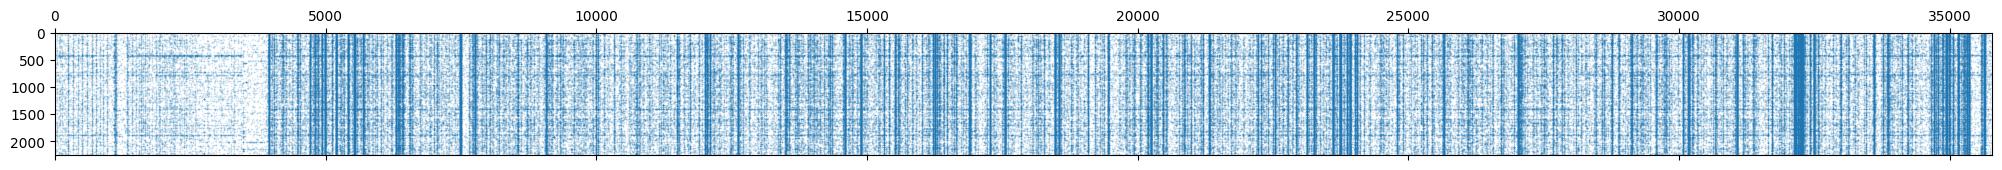

In [15]:
# Answer here
##Approach 1: To plot the entire term-document sparse matrix
fig = plt.figure(figsize = (25, 10))
ax = fig.subplots()
ax.spy(X_counts, markersize=0.05)
plt.show()

##Drawback: It's basically useless since we can't get information from it

In [16]:
##Approach 2: Samples the terms and documents
term_counts = X_counts.shape[1] # The number of terms: 35788
doc_counts = X_counts.shape[0] # The number of docs: 2257
## 1. Add up the occurrence of terms in documents(each document will have a total occurrence)
occur_sum = [np.sum(X_counts[i, 0:term_counts]) for i in list(X.index)]
## 2. Calculate the mean occurrence of terms for docs
occur_mean = np.mean(occur_sum)
## 3. Drop those docs with less occurrence than mean
docs = pd.Series(occur_sum)
docs = docs[docs > occur_mean]
# len(docs) = 605, we now have only 605 docs
## 4. Do the same thing for the terms
occur_sum = [np.sum(X_counts[0:doc_counts, i]) for i in range(term_counts)]
occur_mean = np.mean(occur_sum)
terms = pd.Series(occur_sum)
terms = terms[terms > occur_mean]
# len(terms) = 3627
## 5. Filter out those terms and docs which are not in the docs and terms series
## 6. plot the matrix

##Drawbacks: It is possible that the docs we filter out contains the most occurrence of "popular" terms,
##           and makes the term become "less popular" in the remain records.

---

In [17]:
# Data preparations
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

---

### >>> **Exercise 12 (take home):**
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

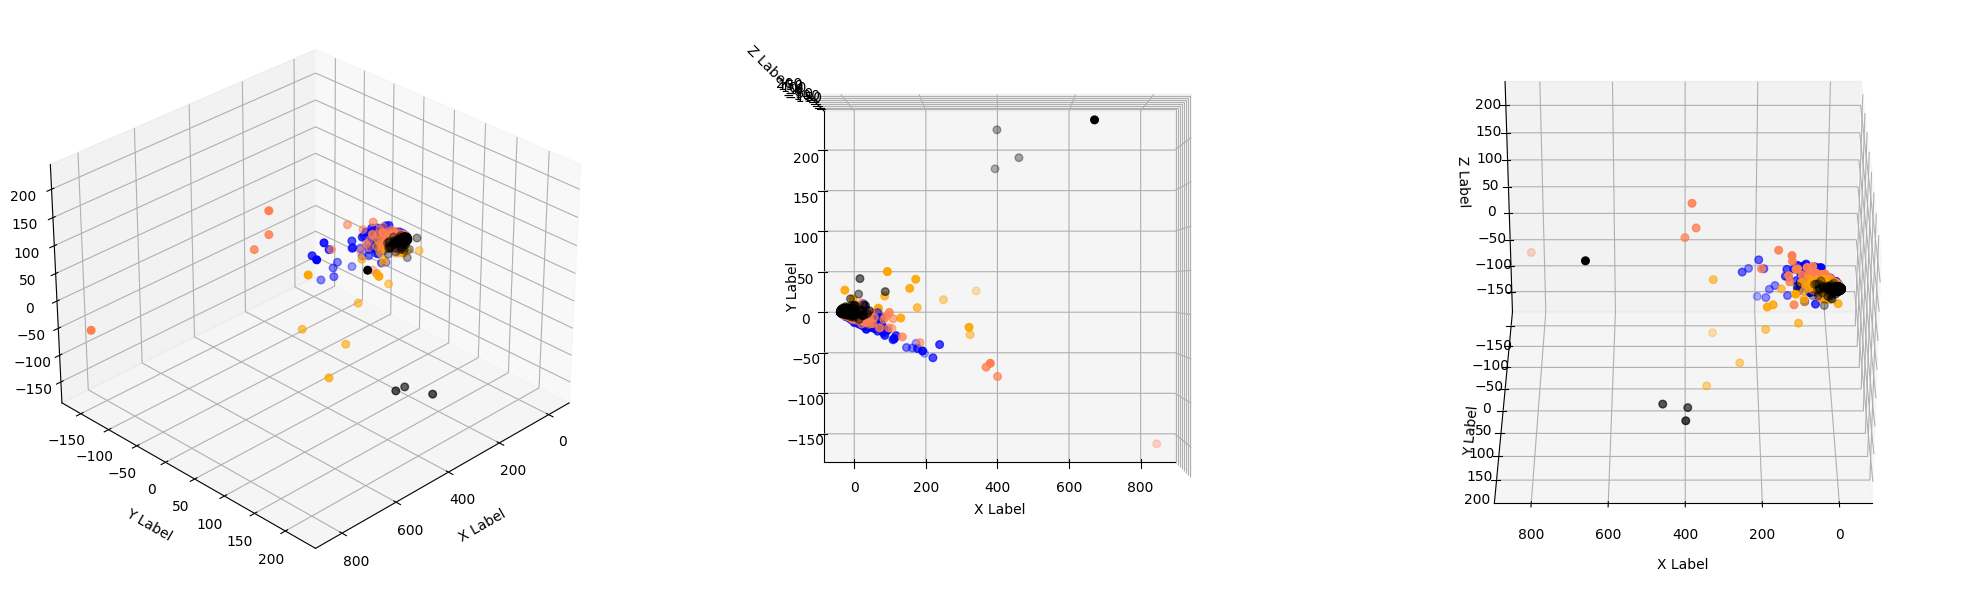

In [18]:
# Answer here

X_reduced_3D = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']

# plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw=dict(projection='3d'), figsize = (25,10))
def newplot(ax, position, angle):

    for c, category in zip(col, categories):
        xs = X_reduced_3D[X['category_name'] == category].T[0]
        ys = X_reduced_3D[X['category_name'] == category].T[1]
        zs = X_reduced_3D[X['category_name'] == category].T[2]

        ax.scatter(xs, ys, zs, c = c, s = 30, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    ax.view_init(elev=position, azim=angle)
    return ax

newplot(ax1, 30, 45)
newplot(ax2, 90, -90) # Looking from Z+ axis
newplot(ax3, 30, 90) # Looking from Y+ axis

plt.show()

In [19]:
# Conclusions
## 1. When we look from Z+ axis, the records looks just like the 2D-plot in the former section.
##    (Because the 2D-plot is the result of projecting onto the XY-plane)
## 2. The records become a lot denser(then the sparse matrix) due to the dimension-reducing process.

---

In [20]:
# Data preparations
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

---

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [21]:
# Answer here
import plotly.express as px
fig = px.bar(x=count_vect.get_feature_names_out()[:300], 
             y=term_frequencies[:300])
fig.show()

---

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 



In [22]:
# Answer here
threshold = 1000 # The threshold of occurrence to drop the terms
termDF = pd.concat({'Term': pd.Series(count_vect.get_feature_names_out()), 
                    'Term Frequency': pd.Series(term_frequencies)}, axis=1) # A nx2 dataframe
termDF = termDF[termDF['Term Frequency'] >= threshold] # Drop the rows with frequency < threshold

fig = px.bar(termDF, x='Term', y='Term Frequency')
fig.show()

---

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [23]:
# Answer here
termDF = pd.concat({'Term': pd.Series(count_vect.get_feature_names_out()), 
                    'Term Frequency': pd.Series(term_frequencies)}, axis=1) # A nx2 dataframe
termDF = termDF.sort_values(by=['Term Frequency'], ascending=False)
fig = px.line(termDF, x='Term', y='Term Frequency')
fig.show()

---

In [24]:
# Data preparations
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [25]:
# Answer here
mlb2 = preprocessing.LabelBinarizer()
mlb2.fit(X.category_name)
X['bin_category_name'] = mlb2.transform(X['category_name']).tolist()
X.loc[0:9, 'bin_category':]

bin_category bin_category_name
0  [0, 1, 0, 0]      [0, 1, 0, 0]
1  [0, 1, 0, 0]      [0, 1, 0, 0]
2  [0, 0, 0, 1]      [0, 0, 0, 1]
3  [0, 0, 0, 1]      [0, 0, 0, 1]
4  [0, 0, 0, 1]      [0, 0, 0, 1]
5  [0, 0, 0, 1]      [0, 0, 0, 1]
6  [0, 0, 0, 1]      [0, 0, 0, 1]
7  [0, 0, 1, 0]      [0, 0, 1, 0]
8  [0, 0, 1, 0]      [0, 0, 1, 0]
9  [0, 0, 1, 0]      [0, 0, 1, 0]

In [26]:
# Conclusion
## The binarization generated with the column category_name turns out the same with using the column category.

---

## Part Two: Same process with a new dataset

### 1. Data preparation

In [27]:
import pandas as pd

# Read in all three txt's
df1 = pd.read_csv("./dataset/sentiment labelled sentences/amazon_cells_labelled.txt",
                  sep="\t", header=None, names=['sentence', 'score'])
df2 = pd.read_csv("./dataset/sentiment labelled sentences/imdb_labelled.txt",
                  sep='\t', quotechar="\'", header=None, names=['sentence', 'score'])
df3 = pd.read_csv("./dataset/sentiment labelled sentences/yelp_labelled.txt",
                  sep="\t", header=None, names=['sentence', 'score'])
# Concat all dataframes into one
df = pd.concat([df1, df2, df3], ignore_index=True)
df

sentence  score
0     So there is no way for me to plug it in here i...      0
1                           Good case, Excellent value.      1
2                                Great for the jawbone.      1
3     Tied to charger for conversations lasting more...      0
4                                     The mic is great.      1
...                                                 ...    ...
2995  I think food should have flavor and texture an...      0
2996                           Appetite instantly gone.      0
2997  Overall I was not impressed and would not go b...      0
2998  The whole experience was underwhelming, and I ...      0
2999  Then, as if I hadn't wasted enough of my life ...      0

[3000 rows x 2 columns]

In [28]:
# Adding column
sentiments = ['negative', 'positive']

df['sentiment'] = df.score.apply(lambda t: sentiments[t])
df

sentence  score sentiment
0     So there is no way for me to plug it in here i...      0  negative
1                           Good case, Excellent value.      1  positive
2                                Great for the jawbone.      1  positive
3     Tied to charger for conversations lasting more...      0  negative
4                                     The mic is great.      1  positive
...                                                 ...    ...       ...
2995  I think food should have flavor and texture an...      0  negative
2996                           Appetite instantly gone.      0  negative
2997  Overall I was not impressed and would not go b...      0  negative
2998  The whole experience was underwhelming, and I ...      0  negative
2999  Then, as if I hadn't wasted enough of my life ...      0  negative

[3000 rows x 3 columns]

### 2.1 Missing values

In [29]:
# Check missing values
df.isnull()

sentence  score  sentiment
0        False  False      False
1        False  False      False
2        False  False      False
3        False  False      False
4        False  False      False
...        ...    ...        ...
2995     False  False      False
2996     False  False      False
2997     False  False      False
2998     False  False      False
2999     False  False      False

[3000 rows x 3 columns]

In [30]:
import helpers.data_mining_helpers_modified as dmh

df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                            sentiment  
0  The amoung of missing records is:   
1                                   0

### 2.2 Duplicate data

In [31]:
sum(df.duplicated())

17

There are 17 duplicated records

In [32]:
# The sentences which are duplicated
df[df['sentence'].duplicated()]

sentence  score sentiment
285                                       Great phone!.      1  positive
407                                        Works great.      1  positive
524                                       Works great!.      1  positive
543                             Don't buy this product.      0  negative
744   If you like a loud buzzing to override all you...      0  negative
748                                       Does not fit.      0  negative
778                               This is a great deal.      1  positive
792                                        Great Phone.      1  positive
892                    Excellent product for the price.      1  positive
896                                        Great phone.      1  positive
1363                   Definitely worth checking out.        1  positive
1585                                 Not recommended.        0  negative
1788                                            10/10        1  positive
2814                                 I love this place.      1  positive
2816                             The food was terrible.      0  negative
2843                                   I won't be back.      0  negative
2846                  I would not recommend this place.      0  negative

In [33]:
# Drop those duplicated records
df.drop_duplicates(inplace=True, ignore_index=True)

In [34]:
len(df)

2983

Now we have 2983 records left

### 3.1 Sampling

In [35]:
df_sample = df.sample(n=1000) # Select 1000 records as sample

In [36]:
df_sample[:10]

sentence  score sentiment
462                                 poor voice clarity.      0  negative
2838  My fella got the huevos rancheros and they did...      0  negative
926   I kept catching the cable on the seat and I ha...      0  negative
225   These are certainly very comfortable and funct...      1  positive
2855  All in all an excellent restaurant highlighted...      1  positive
733   The tracfonewebsite is user friendly and makes...      1  positive
1975  It was a riot to see Hugo Weaving play a sex-o...      1  positive
2260  Stopped by this place while in Madison for the...      1  positive
2418                           We loved the biscuits!!!      1  positive
2412                                     No complaints!      1  positive

            df  df_sample  df normalized  df_sample normalized
negative  1493        518       0.500503                 0.518
positive  1490        482       0.499497                 0.482


<AxesSubplot: title={'center': 'Sentiment distribution(normalized)'}>

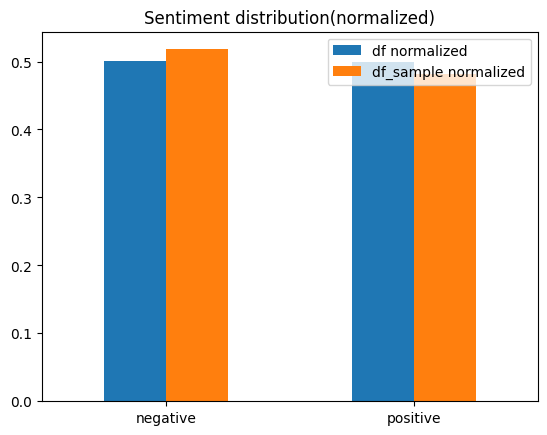

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

s1 = df.sentiment.value_counts()
s1_n = df.sentiment.value_counts(normalize=True)
s2 = df_sample.sentiment.value_counts()
s2_n = df_sample.sentiment.value_counts(normalize=True)
df2 = pd.concat({'df': s1,
                 'df_sample': s2,
                 'df normalized': s1_n,
                 'df_sample normalized': s2_n}, axis=1)
print(df2)
df2.plot.bar(title='Sentiment distribution(normalized)',
             y=['df normalized', 'df_sample normalized'], rot=0)

The sample has about the same distribution of sentiment as the original dataframe

### 3.2 Feature creation

In [38]:
import nltk

# takes a like a minute or two to process
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [39]:
df[0:5]["unigrams"] # the extracted tokens of the first five records

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
4                             [The, mic, is, great, .]
Name: unigrams, dtype: object

### 3.3 Feature subset selection

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence) #learn the vocabulary and return document-term matrix
print(df_counts[0])

  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [41]:
df_counts.shape

(2983, 5155)

We now have 2983 sentences with 5155 words

In [42]:
count_vect.get_feature_names_out()[0:10] # The first ten terms the vectorizer extracted

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

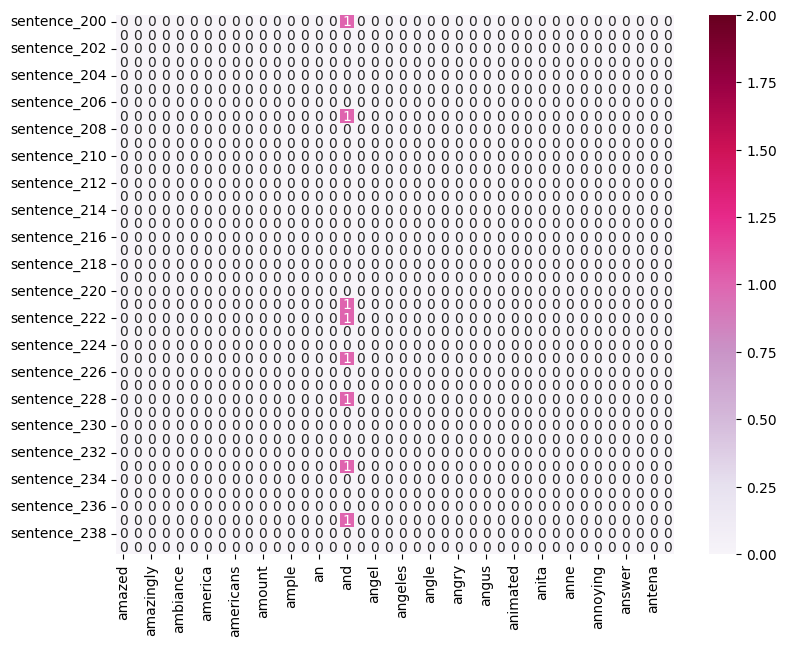

In [43]:
# forty terms
plot_x = count_vect.get_feature_names_out()[200:240]
# forty sentences
plot_y = ["sentence_"+ str(i) for i in list(df.index)[200:240]]
plot_z = df_counts[200:240, 200:240].toarray()

# The heatmap of these forty terms and forty sentences
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=2, annot=True)

### 3.4 Dimensionality Reduction

In [44]:
from sklearn.decomposition import PCA

df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
df_reduced.shape

(2983, 2)

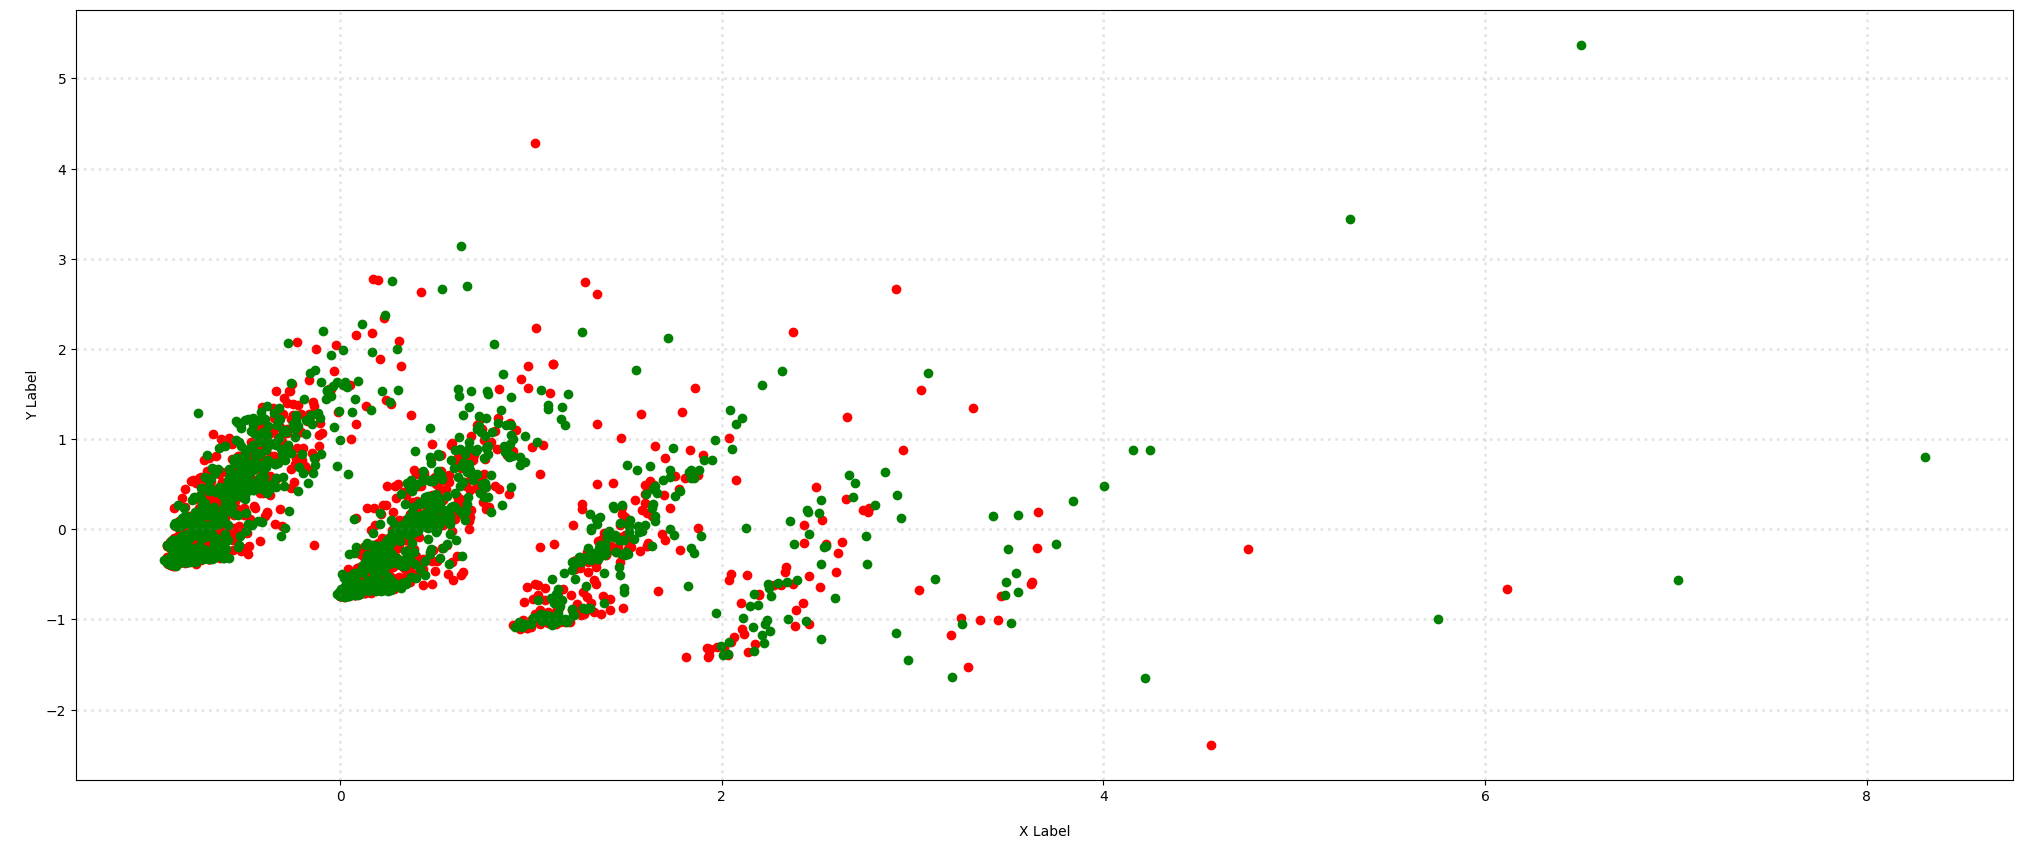

In [45]:
col = ['red', 'green']
sentiments = ['negative', 'positive']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, sentiment in zip(col, sentiments):
    xs = df_reduced[df['sentiment'] == sentiment].T[0]
    ys = df_reduced[df['sentiment'] == sentiment].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

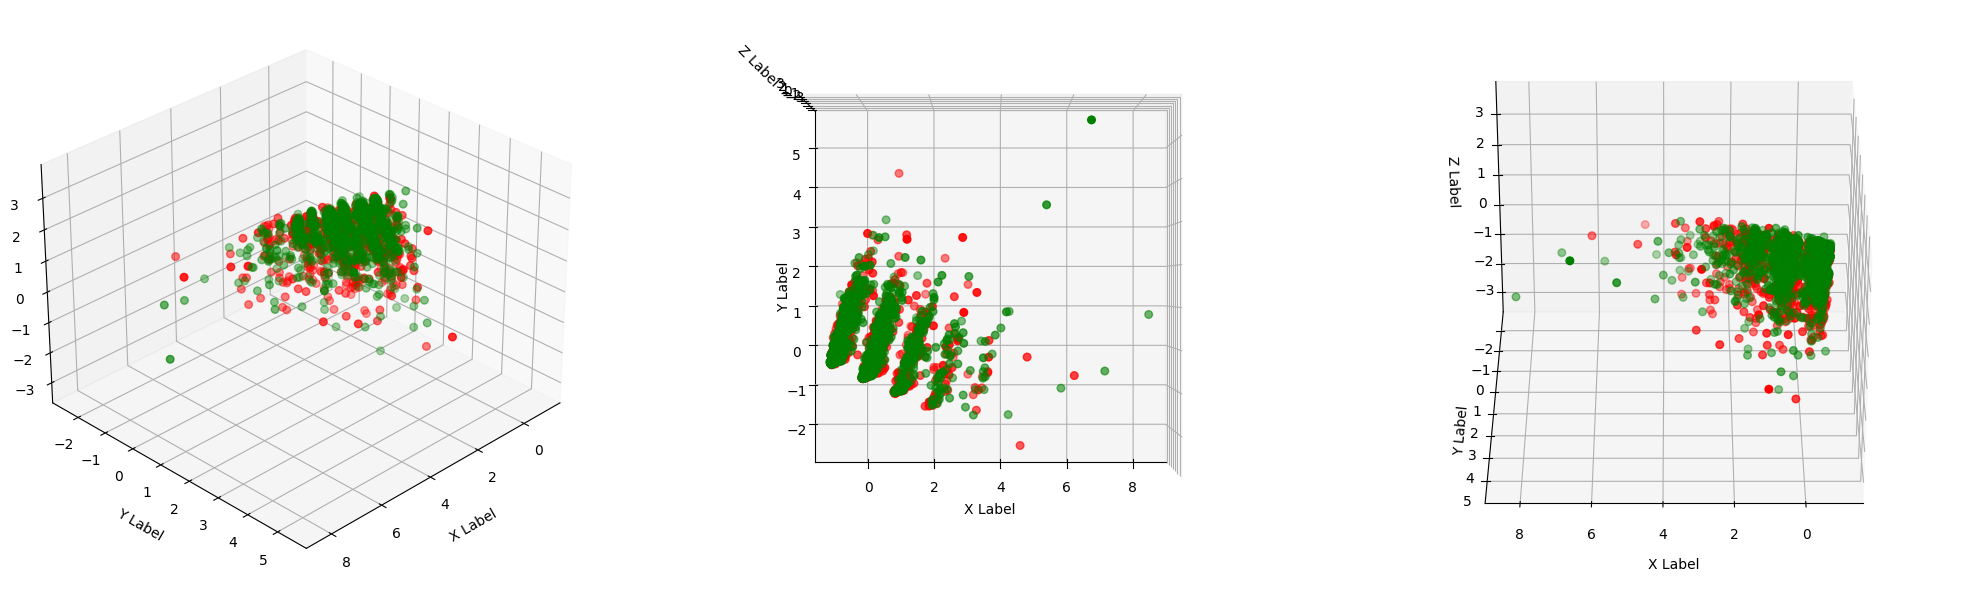

In [46]:
# The 3D-projection of the term-vector matrix
df_reduced_3D = PCA(n_components = 3).fit_transform(df_counts.toarray())

col = ['red', 'green']

# plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw=dict(projection='3d'), figsize = (25,10))
def newplot(ax, position, angle):

    for c, sentiment in zip(col, sentiments):
        xs = df_reduced_3D[df['sentiment'] == sentiment].T[0]
        ys = df_reduced_3D[df['sentiment'] == sentiment].T[1]
        zs = df_reduced_3D[df['sentiment'] == sentiment].T[2]

        ax.scatter(xs, ys, zs, c = c, s = 30, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    ax.view_init(elev=position, azim=angle)
    return ax

newplot(ax1, 30, 45)
newplot(ax2, 90, -90) # Looking from Z+ axis
newplot(ax3, 30, 90) # Looking from Y+ axis

plt.show()

### 3.5 Attribute Transformation / Aggregation

In [47]:
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

import numpy as np

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [48]:
term_frequencies[75] #sum of 76th term: "about"

85

In [49]:
# The distribution of first-300-term occurrence
import plotly.express as px
fig = px.bar(x=count_vect.get_feature_names_out()[:300], 
             y=term_frequencies[:300])
fig.show()

In [50]:
# Same graph but with log-Y-axis
fig = px.bar(x=count_vect.get_feature_names_out()[:300], 
             y=term_frequencies[:300],
            log_y=True)
fig.show()

### 3.6 Discretization and Binarization

In [51]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(df.score)

df['bin_score'] = mlb.transform(df['score']).tolist()
df[:10]

sentence  score sentiment  \
0  So there is no way for me to plug it in here i...      0  negative   
1                        Good case, Excellent value.      1  positive   
2                             Great for the jawbone.      1  positive   
3  Tied to charger for conversations lasting more...      0  negative   
4                                  The mic is great.      1  positive   
5  I have to jiggle the plug to get it to line up...      0  negative   
6  If you have several dozen or several hundred c...      0  negative   
7        If you are Razr owner...you must have this!      1  positive   
8                Needless to say, I wasted my money.      0  negative   
9                   What a waste of money and time!.      0  negative   

                                            unigrams bin_score  
0  [So, there, is, no, way, for, me, to, plug, it...       [0]  
1               [Good, case, ,, Excellent, value, .]       [1]  
2                      [Great, for, the, jawbone, .]       [1]  
3  [Tied, to, charger, for, conversations, lastin...       [0]  
4                           [The, mic, is, great, .]       [1]  
5  [I, have, to, jiggle, the, plug, to, get, it, ...       [0]  
6  [If, you, have, several, dozen, or, several, h...       [0]  
7  [If, you, are, Razr, owner, ..., you, must, ha...       [1]  
8    [Needless, to, say, ,, I, wasted, my, money, .]       [0]  
9       [What, a, waste, of, money, and, time, !, .]       [0]

In [52]:
mlb2 = preprocessing.LabelBinarizer()
mlb2.fit(df.sentiment)
df['bin_sentiment'] = mlb2.transform(df['sentiment']).tolist()
df.loc[0:9, 'bin_score':]

bin_score bin_sentiment
0       [0]           [0]
1       [1]           [1]
2       [1]           [1]
3       [0]           [0]
4       [1]           [1]
5       [0]           [0]
6       [0]           [0]
7       [1]           [1]
8       [0]           [0]
9       [0]           [0]

The binarizations generated by different attributes (`score` and `sentiment`) are the same

### 4. Data Exploration

In [53]:
# Retrieve 3 random sentences
random_numbers = np.random.randint(df.shape[0], size=3)

sentence_to_transform_1 = []
random_record_1 = df.iloc[random_numbers[0]]
random_record_1 = random_record_1['sentence']
sentence_to_transform_1.append(random_record_1)

sentence_to_transform_2 = []
random_record_2 = df.iloc[random_numbers[1]]
random_record_2 = random_record_2['sentence']
sentence_to_transform_2.append(random_record_2)

sentence_to_transform_3 = []
random_record_3 = df.iloc[random_numbers[2]]
random_record_3 = random_record_3['sentence']
sentence_to_transform_3.append(random_record_3)

In [54]:
print(sentence_to_transform_1)
print(sentence_to_transform_2)
print(sentence_to_transform_3)

['I have recommended it to friends.  ']
['This is cool because most cases are just open there allowing the screen to get all scratched up.']
['EXCELLENT SERVICE!!!!!!!!.']


In [55]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
sentence_vector_count_1 = count_vect.transform(sentence_to_transform_1)
sentence_vector_count_2 = count_vect.transform(sentence_to_transform_2)
sentence_vector_count_3 = count_vect.transform(sentence_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
sentence_vector_count_1_bin = binarize(sentence_vector_count_1)
sentence_vector_count_2_bin = binarize(sentence_vector_count_2)
sentence_vector_count_3_bin = binarize(sentence_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(sentence_vector_count_1.todense())
print(sentence_vector_count_2.todense())
print(sentence_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [56]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(sentence_vector_count_1, sentence_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(sentence_vector_count_1, sentence_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(sentence_vector_count_2, sentence_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(sentence_vector_count_1, sentence_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(sentence_vector_count_2, sentence_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(sentence_vector_count_3, sentence_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.105409
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


## Part Three: Features with the new dataset

### 1. TF-IDF features generating

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['sentence'])

vectorizer.get_feature_names_out()

array(['00', '10', '100', ..., 'zillion', 'zombie', 'zombiez'],
      dtype=object)

In [58]:
vectorizer.get_feature_names_out()[100:150] # Some terms the vectorizer extracted

array(['accomodate', 'accompanied', 'according', 'accordingly',
       'accountant', 'accurate', 'accurately', 'accused', 'ache',
       'achievement', 'achille', 'ackerman', 'acknowledged', 'across',
       'act', 'acted', 'acting', 'action', 'actions', 'activate',
       'activated', 'activesync', 'actor', 'actors', 'actress',
       'actresses', 'actual', 'actually', 'ad', 'adams', 'adaptation',
       'adapter', 'adapters', 'add', 'added', 'addition', 'additional',
       'address', 'adhesive', 'admins', 'admiration', 'admitted',
       'adorable', 'adrift', 'adventure', 'advertised', 'advise',
       'aerial', 'aesthetically', 'affected'], dtype=object)

In [59]:
X.shape

(2983, 5155)

2983 sentences, 5155 terms (same with the one generated by `CountVectorizer()`)

In [60]:
print(X[:2]) # The weights of terms in first two sentences

  (0, 1013)	0.39845543988934873
  (0, 647)	0.2233655373587691
  (0, 1982)	0.2314910330235545
  (0, 4793)	0.3319671168188344
  (0, 4835)	0.2754374241479848
  (0, 4531)	0.08660987696634037
  (0, 2158)	0.22274667474668547
  (0, 2314)	0.29538734318239734
  (0, 2432)	0.11967447562998453
  (0, 3387)	0.30868158568324194
  (0, 4609)	0.12743956571028017
  (0, 2809)	0.2286268276414034
  (0, 1829)	0.15641232030594823
  (0, 4987)	0.24912754996231995
  (0, 3043)	0.2233655373587691
  (0, 2427)	0.12068879835601415
  (0, 4545)	0.20758518394408282
  (0, 4161)	0.1873972955866557
  (1, 4861)	0.633627682893175
  (1, 1603)	0.47208678028809276
  (1, 713)	0.512627326445873
  (1, 1993)	0.3359512695758188


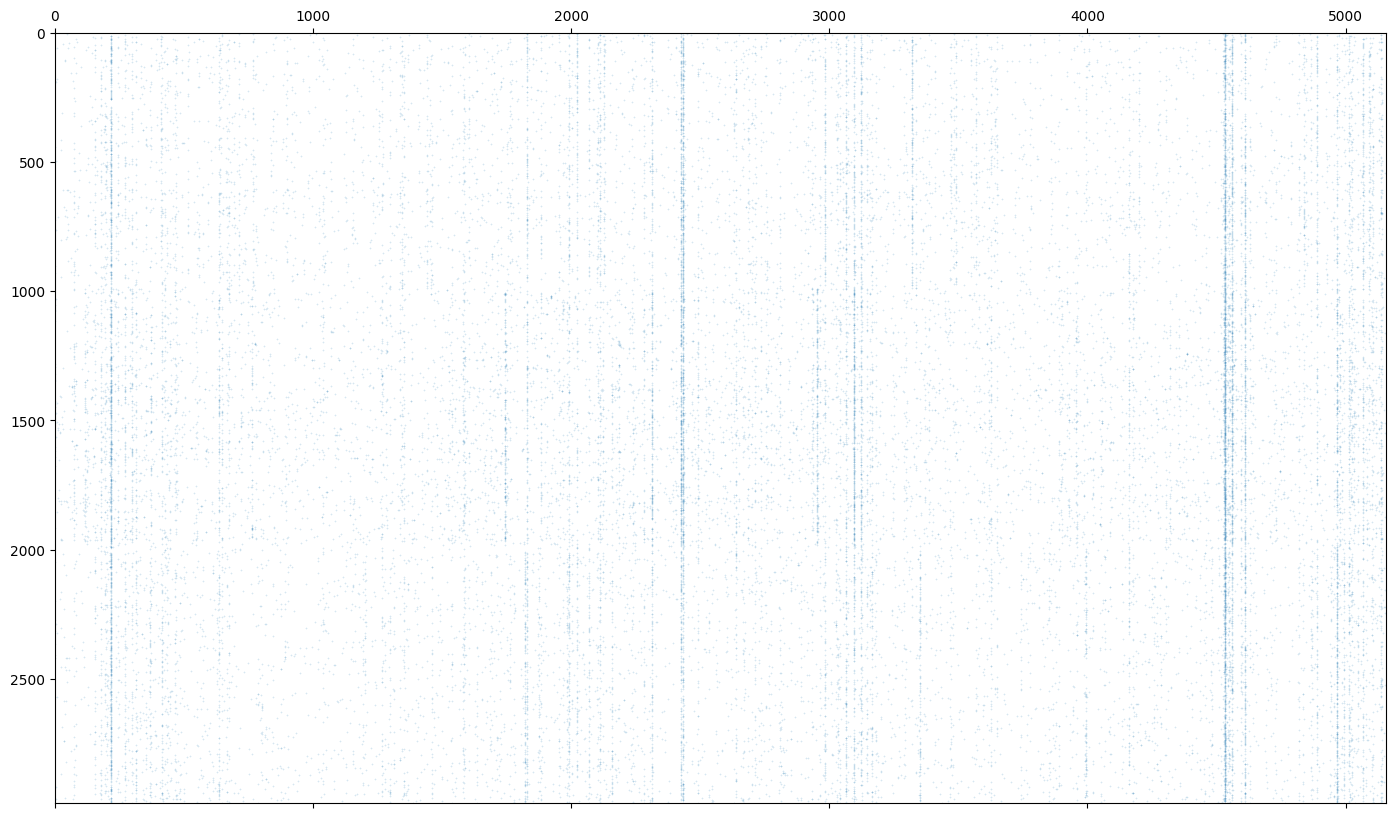

In [61]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (25, 10))
ax = fig.subplots()
ax.spy(X, markersize=0.05)
plt.show()

The sparse matrix visualization, the more clear a verticle line is, the more weight the term has.

### 2. Naive Bayse Classifier

In [62]:
from sklearn.naive_bayes import *
from sklearn.model_selection import train_test_split

#### 2.1 Using TF-IDF features

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    df['score'],test_size=0.25)

bnb = BernoulliNB()
bnb.fit(X_train, Y_train)
print("Score:", bnb.score(X_test, Y_test))

Score: 0.806970509383378


In [64]:
# Pick a random sentence and try to predict the sentiment with the classifier
random_num = np.random.randint(df.shape[0])
sentence_to_predict = df.iloc[random_num]
sentence_count = X[random_num]
print("Sentence: \"", df.loc[random_num, 'sentence'], "\"")

print("Sentiment / Predicted:", df.loc[random_num, 'sentiment']
                              ,"/", sentiments[bnb.predict(sentence_count)[0]])

Sentence: " This place was such a nice surprise! "
Sentiment / Predicted: positive / positive


In [65]:
# Pick 1000 random sentences and calculate the match rate
match_count = 0
for i in range(1000):
    random_num = np.random.randint(df.shape[0])
    sentence_count = X[random_num]
    match_count += (df.loc[random_num, 'score'] == bnb.predict(sentence_count))
    # print("Sentence: ", df.iloc[random_num]['sentence'])
    # print(df.loc[random_num, 'score'], bnb.predict(sentence_count)[0])
print("Result:", match_count[0], "matches out of 1000 predictions.")

Result: 913 matches out of 1000 predictions.


#### 2.2 Using word frequency features

In [66]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df_counts,
                                                        df['score'],test_size=0.25)

bnb2 = BernoulliNB()
bnb2.fit(X_train2, Y_train2)
print("Score:", bnb2.score(X_test2, Y_test2))

Score: 0.8310991957104558


In [67]:
# Pick a random sentence and try to predict the sentiment with the classifier
random_num = np.random.randint(df.shape[0])
sentence_to_predict = df.iloc[random_num]
sentence_count = df_counts[random_num]
print("Sentence: \"", df.loc[random_num, 'sentence'], "\"")

print("Sentiment / Predicted:", df.loc[random_num, 'sentiment']
                              ,"/", sentiments[bnb2.predict(sentence_count)[0]])

Sentence: " Bad script, bad direction and horrible acting make this one plain bad!   "
Sentiment / Predicted: negative / negative


In [68]:
# Pick 1000 random sentences and calculate the match rate
match_count = 0
for i in range(1000):
    random_num = np.random.randint(df.shape[0])
    sentence_count = df_counts[random_num]
    match_count += (df.loc[random_num, 'score'] == bnb2.predict(sentence_count))
    # print("Sentence: ", df.iloc[random_num]['sentence'])
    # print(df.loc[random_num, 'score'], bnb2.predict(sentence_count)[0])
print("Result:", match_count[0], "matches out of 1000 predictions.")

Result: 922 matches out of 1000 predictions.


#### 2.3 Differences

If we pick some random sentences and use both classifier to predict the sentiment, and do it 20 times:

TF-IDF matches: [176, 176, 178, 183, 183, 176, 185, 187, 181, 186, 186, 186, 187, 186, 188, 186, 176, 182, 183, 181]
Word frequency matches: [176, 181, 179, 178, 183, 180, 186, 187, 180, 183, 184, 187, 180, 188, 186, 189, 177, 185, 181, 185]


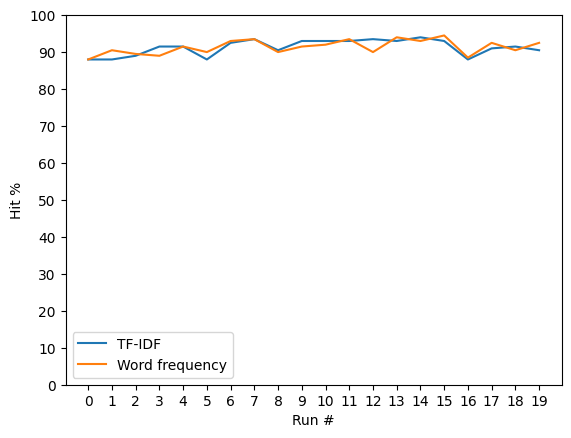

In [69]:
tf_idf_matches = []
word_freq_matches = []
run_time = 20
sentences_count = 200 # Amount of sentences we want to pick each run

for _ in range(run_time):
    random_num = np.random.randint(df.shape[0], size=sentences_count)
    tf_idf_match = 0
    word_freq_match = 0
    for i in random_num:
        sentence_to_predict = df.iloc[i]
        sentence_count1 = X[i]
        sentence_count2 = df_counts[i]
        tf_idf_match += (df.loc[i, 'score'] == bnb.predict(sentence_count1)[0])
        word_freq_match += (df.loc[i, 'score'] == bnb2.predict(sentence_count2)[0])
    tf_idf_matches.append(tf_idf_match)
    word_freq_matches.append(word_freq_match)

print("TF-IDF matches:", tf_idf_matches)
print("Word frequency matches:", word_freq_matches)

tf_idf_match_rates = [(i/sentences_count) * 100 for i in tf_idf_matches]
word_freq_match_rates = [(i/sentences_count) * 100 for i in word_freq_matches]
    
plt.plot(tf_idf_match_rates, label="TF-IDF")
plt.plot(word_freq_match_rates, label="Word frequency")
plt.xticks(range(run_time))
plt.yticks(range(0, 110, 10))
plt.xlabel("Run #")
plt.ylabel("Hit %")
plt.legend()
plt.show()
    

We can see that the match rate are pretty close.

But if we apply the Gaussian Naive Bayes classifier:

In [70]:
gnb = GaussianNB()
gnb.fit(X_train.toarray(), Y_train)
print("Score:", gnb.score(X_test.toarray(), Y_test))

gnb2 = GaussianNB()
gnb2.fit(X_train2.toarray(), Y_train)
print("Score:", gnb2.score(X_test2.toarray(), Y_test))

Score: 0.6541554959785523
Score: 0.5361930294906166


TF-IDF matches: [165, 169, 157, 166, 163, 166, 167, 160, 164, 172, 168, 169, 167, 160, 171, 164, 159, 163, 177, 165]
Word frequency matches: [98, 98, 97, 93, 100, 101, 103, 111, 109, 101, 95, 116, 97, 92, 95, 101, 81, 104, 107, 97]


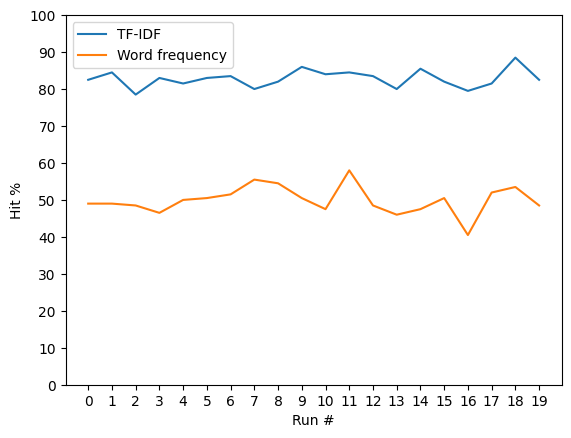

In [71]:
tf_idf_matches = []
word_freq_matches = []
run_time = 20
sentences_count = 200 # Amount of sentences we want to pick each run

for _ in range(run_time):
    random_num = np.random.randint(df.shape[0], size=sentences_count)
    tf_idf_match = 0
    word_freq_match = 0
    for i in random_num:
        sentence_to_predict = df.iloc[i]
        sentence_count = X[i].toarray()
        sentence_count2 = df_counts[i].toarray()
        tf_idf_match += (df.loc[i, 'score'] == gnb.predict(sentence_count)[0])
        word_freq_match += (df.loc[i, 'score'] == gnb2.predict(sentence_count)[0])
    tf_idf_matches.append(tf_idf_match)
    word_freq_matches.append(word_freq_match)

print("TF-IDF matches:", tf_idf_matches)
print("Word frequency matches:", word_freq_matches)

tf_idf_match_rates = [(i/sentences_count) * 100 for i in tf_idf_matches]
word_freq_match_rates = [(i/sentences_count) * 100 for i in word_freq_matches]
    
plt.plot(tf_idf_match_rates, label="TF-IDF")
plt.plot(word_freq_match_rates, label="Word frequency")
plt.xticks(range(run_time))
plt.yticks(range(0, 110, 10))
plt.xlabel("Run #")
plt.ylabel("Hit %")
plt.legend()
plt.show()

The TF-IDF has much better performance than the Word frequency-trained classifier

#### Match rate between each Naive Bayes classifiers(with TF-IDF vectors)

In [72]:
# Training with same data train-test splits
bnb = BernoulliNB()
bnb.fit(X_train, Y_train)
print("Score:", bnb.score(X_test, Y_test))

gnb = GaussianNB()
gnb.fit(X_train.toarray(), Y_train)
print("Score:", gnb.score(X_test.toarray(), Y_test))

mnb = MultinomialNB()
mnb.fit(X_train.toarray(), Y_train)
print("Score:", mnb.score(X_test.toarray(), Y_test))

cnb = ComplementNB()
cnb.fit(X_train.toarray(), Y_train)
print("Score:", cnb.score(X_test.toarray(), Y_test))

clf = CategoricalNB(min_categories=2)
clf.fit(X_train.toarray(), Y_train)
print("Score:", clf.score(X_test.toarray(), Y_test))

Score: 0.806970509383378
Score: 0.6541554959785523
Score: 0.8150134048257373
Score: 0.8203753351206434
Score: 0.4691689008042895


Bernoulli NB matches: [185, 185, 180, 180, 184, 184, 182, 181, 182, 186, 180, 191, 180, 186, 183, 182, 179, 183, 181, 183]
Gaussian NB matches: [161, 165, 159, 158, 177, 181, 174, 172, 171, 169, 175, 166, 166, 166, 176, 167, 159, 178, 172, 160]
Multinomial NB matches: [185, 184, 182, 182, 186, 184, 186, 183, 182, 184, 182, 190, 180, 186, 181, 185, 182, 186, 185, 183]
Complement NB matches: [186, 185, 181, 183, 187, 184, 187, 184, 182, 184, 182, 190, 181, 186, 181, 185, 177, 186, 186, 184]
Categorical NB matches: [100, 113, 113, 106, 111, 93, 88, 97, 111, 111, 104, 97, 97, 108, 107, 99, 98, 94, 92, 117]


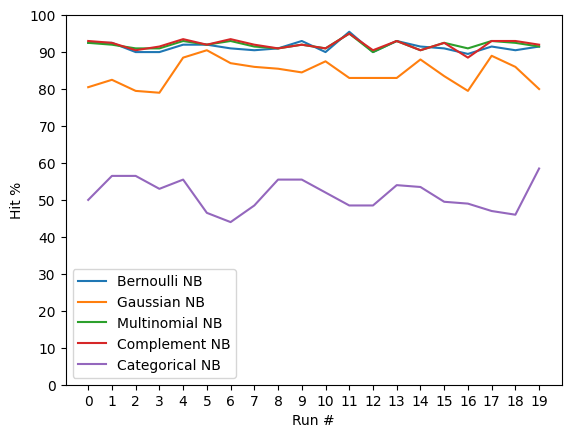

In [73]:
bnb_matches = []
gnb_matches = []
mnb_matches = []
cnb_matches = []
clf_matches = []
run_time = 20
sentences_count = 200 # Amount of sentences we want to pick each run

for _ in range(run_time):
    random_num = np.random.randint(df.shape[0], size=sentences_count)
    bnb_match = 0
    gnb_match = 0
    mnb_match = 0
    cnb_match = 0
    clf_match = 0
    
    for i in random_num:
        # sentence_to_predict = df.iloc[i]
        sentence_count = X[i]
        bnb_match += (df.loc[i, 'score'] == bnb.predict(sentence_count)[0])
        gnb_match += (df.loc[i, 'score'] == gnb.predict(sentence_count.toarray())[0])
        mnb_match += (df.loc[i, 'score'] == mnb.predict(sentence_count.toarray())[0])
        cnb_match += (df.loc[i, 'score'] == cnb.predict(sentence_count.toarray())[0])
        clf_match += (df.loc[i, 'score'] == clf.predict(sentence_count.toarray())[0])

    bnb_matches.append(bnb_match)
    gnb_matches.append(gnb_match)
    mnb_matches.append(mnb_match)
    cnb_matches.append(cnb_match)
    clf_matches.append(clf_match)
    

print("Bernoulli NB matches:", bnb_matches)
print("Gaussian NB matches:", gnb_matches)
print("Multinomial NB matches:", mnb_matches)
print("Complement NB matches:", cnb_matches)
print("Categorical NB matches:", clf_matches)

bnb_match_rates = [(i/sentences_count) * 100 for i in bnb_matches]
gnb_match_rates = [(i/sentences_count) * 100 for i in gnb_matches]
mnb_match_rates = [(i/sentences_count) * 100 for i in mnb_matches]
cnb_match_rates = [(i/sentences_count) * 100 for i in cnb_matches]
clf_match_rates = [(i/sentences_count) * 100 for i in clf_matches]
    
plt.plot(bnb_match_rates, label="Bernoulli NB")
plt.plot(gnb_match_rates, label="Gaussian NB")
plt.plot(mnb_match_rates, label="Multinomial NB")
plt.plot(cnb_match_rates, label="Complement NB")
plt.plot(clf_match_rates, label="Categorical NB")
plt.xticks(range(run_time))
plt.yticks(range(0, 110, 10))
plt.xlabel("Run #")
plt.ylabel("Hit %")
plt.legend()
plt.show()

The Categorical Naive Bayes classifier has much worse performance than other classifiers (might be wrong parameters passed into the `CategoricalNB()` )

## Part Four: Improvements

At the **`3.1 Converting Dictionary into Pandas Dataframe`** part, we first construct the dataframe **`X`**:

In [74]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

...and then append each columns

In [75]:
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

This process can be accomplished with one command by using numpy's `c_` function:

In [76]:
## >>> np.c_[np.array([1,2,3]), np.array([4,5,6])]
## array([[1, 4],
##        [2, 5],
##        [3, 6]])

import numpy as np

Y = pd.DataFrame(data= np.c_[dmh.format_rows(twenty_train), twenty_train['target'],
                             pd.Series(twenty_train['target']).apply(lambda t: dmh.format_labels(t, twenty_train))],
                 columns= ['text', 'category', 'category_name'])

In [77]:
pd.concat([X, Y], axis=1)

text category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...        1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...        1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...        3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...        3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...        3   
...                                                 ...      ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...        2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...        2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...        2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...        2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...        2   

               category_name  \
0              comp.graphics   
1              comp.graphics   
2     soc.religion.christian   
3     soc.religion.christian   
4     soc.religion.christian   
...                      ...   
2252                 sci.med   
2253                 sci.med   
2254                 sci.med   
2255                 sci.med   
2256                 sci.med   

                                                   text category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...        1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...        1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...        3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...        3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...        3   
...                                                 ...      ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...        2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...        2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...        2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...        2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...        2   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
...                      ...  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med  

[2257 rows x 6 columns]

When we put two dataframes side by side, we can see these two dataframes are the same.